## A Comprehensive Beginner’s Guide to Create a Time Series Forecast in Python

### What makes Time Series Special?

As the name suggests, TS is a collection of data points collected at constant time intervals. These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis. But what makes a TS different from say a regular regression problem? There are 2 things:

1. It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
2. Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

 ### Loading and Handling Time Series in Pandas

Pandas has dedicated libraries for handling TS objects, particularly the datatime64[ns] class which stores time information and allows us to perform some operations really fast. Lets start by firing up the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 15, 6

Now, we can load the data set and look at some initial rows and data types of the columns:

In [2]:
data = pd.read_csv("AirPassengers.csv")
print data.head()
print '\n Data Types:'
print data.dtypes

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121

 Data Types:
Month         object
Passengers     int64
dtype: object


The data contains a particular month and number of passengers travelling in that month. But this is still not read as a TS object as the data types are ‘object’ and ‘int’. In order to read the data as a time series, we have to pass special arguments to the read_csv command:

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data = pd.read_csv("AirPassengers.csv", index_col = 'Month', date_parser = dateparse)

print data.columns
print data.head()

Index([u'Passengers'], dtype='object')
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


Let’s understand the arguments one by one:

1. parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.
2. index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.
3. date_parser: This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

Now we can see that the data has time object as index and #Passengers as the column. We can cross-check the datatype of the index with the following command:

In [4]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

Notice the dtype=’datetime[ns]’ which confirms that it is a datetime object. As a personal preference, I would convert the column into a Series object to prevent referring to columns names every time I use the TS. Please feel free to use as a dataframe is that works better for you.

### Convert to the time series format:

In [6]:
print type(data['Passengers'])

<class 'pandas.core.series.Series'>


In [8]:
ts = data['Passengers']
ts.head(5)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

### Indexing TS arrays:

#### 1. Specify the entire range:

In [9]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

#### 2. Use ':' if one of the indices is at ends:

In [10]:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

#### All rows of 1949:

In [11]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64

### Checking for stationarity

#### Plot the time-series

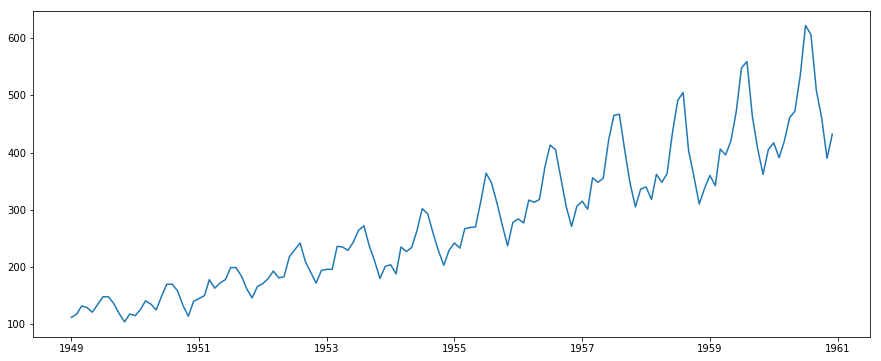

In [12]:
plt.plot(ts)

### In the folowing link is explained with more details about stationarity:

https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

### Why do we care about ‘stationarity’ of a time series?

We cannot build a time series model, in cases where the stationary criterion are violated, the first requisite becomes to stationarize the time series and then try stochastic models to predict this time series. There are multiple ways of bringing this stationarity. Some of them are Detrending, Differencing etc.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1. constant mean
2. constant variance
3. an autocovariance that does not depend on time.

Exploring data becomes most important in a time series model – without this exploration, you will not know whether a series is stationary or not. Stationary testing and converting a series into a stationary series are the most critical processes in a time series modelling. You need to memorize each and every detail of this concept to move on to the next step of time series modelling.

## Stationary Analysis:

### Plotting Rolling Statistics: 

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

In [13]:
def plotRollingMeanSTD(timeSeries, windowRange):
    
    # Determing rolling statistics
    rollingMean = timeSeries.rolling(window = windowRange, center = False).mean()
    rollingSTD = timeSeries.rolling(window = windowRange, center = False).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize = (15, 8))
    orig = plt.plot(timeSeries, color = 'blue', label = 'Original')
    mean = plt.plot(rollingMean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rollingSTD, color = 'black', label = 'Rolling STD')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & STD')
    plt.show()
    return

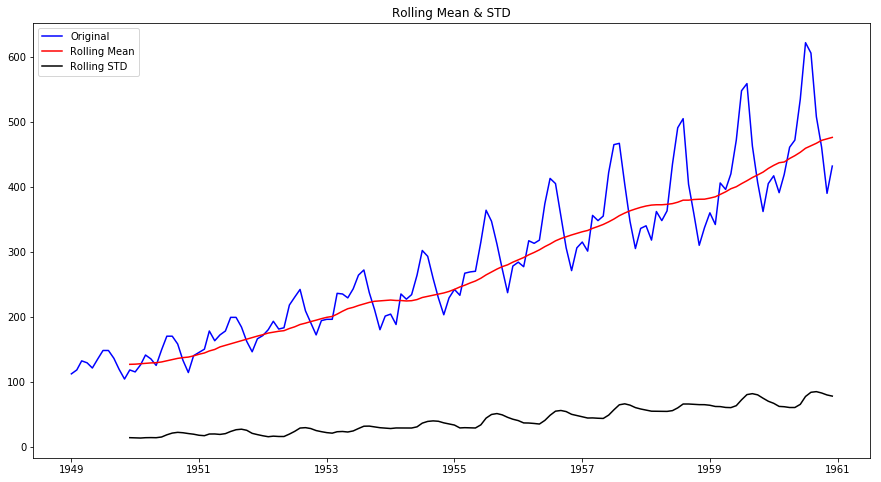

In [16]:
plotRollingMeanSTD(ts, 12)

### Dickey-Fuller Test:

This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller

def DickeyFullerTest(timeSeries):
    
    # Perform Dickey-Fuller Test:
    DFAIC = adfuller(timeSeries, autolag = 'AIC')
    DFAIC_OUT = pd.Series(DFAIC[0:4], index = ['Test Statistic:','p-value:','Lag No.:','Observation No.:'])
    for key, value in DFAIC[4].items():
        DFAIC_OUT['Critical Value (%s)'%key] = value

    print 'Results of Dickey-Fuller Test:'
    print DFAIC_OUT
    return

In [17]:
DickeyFullerTest(ts)

Results of Dickey-Fuller Test:
Test Statistic:           0.815369
p-value:                  0.991880
Lag No.:                 13.000000
Observation No.:        130.000000
Critical Value (5%)      -2.884042
Critical Value (1%)      -3.481682
Critical Value (10%)     -2.578770
dtype: float64


Though the variation in standard deviation is small, mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values. Note that the signed values should be compared and not the absolute values.

## How to make a Time Series Stationary?

Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which we’ll discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:
1. <font color='blue'>Trend</font>  – varying mean over time. For example in this case, we saw that on average, the number of passengers was growing over time.
2. <font color='blue'>Seasonality</font> – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

#### Estimating & Eliminating Trend

One of the first tricks to reduce trend can be <font color='blue'>transformation</font>. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity:

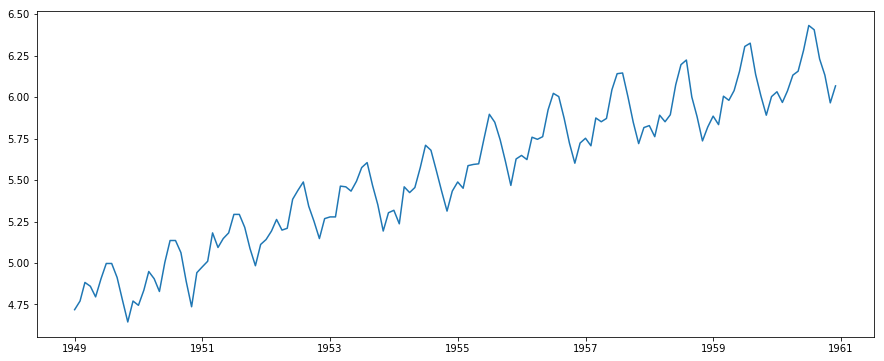

In [18]:
tsLog = np.log(ts)
plt.plot(tsLog)

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

1. <font color='blue'>Aggregation</font> – taking average for a time period like monthly/weekly averages
2. <font color='blue'>Smoothing</font> – taking rolling averages
3. <font color='blue'>Polynomial Fitting</font> – fit a regression model

I will discuss smoothing here and you should try other techniques as well which might work out for other problems. Smoothing refers to taking rolling estimates, i.e. considering the past few instances. There are can be various ways but I will discuss two of those here.

In the following link, you will find more about time series transformation:

https://people.duke.edu/~rnau/whatuse.htm

### Smoothing:
#### Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

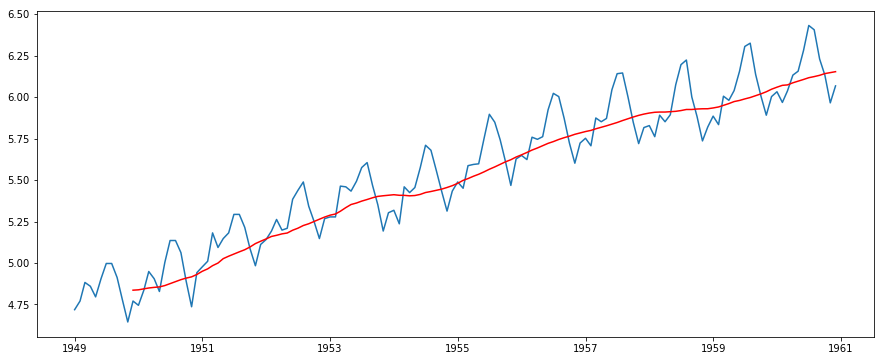

In [20]:
movingAvg = tsLog.rolling(window = 12, center = False).mean()
plt.plot(tsLog)
plt.plot(movingAvg, color='red')

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [21]:
ts_log_moving_avg_diff = tsLog - movingAvg
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: Passengers, dtype: float64

Notice the first 11 being NaN. Lets drop these NaN values and check the plots to test stationarity.

In [22]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: Passengers, dtype: float64

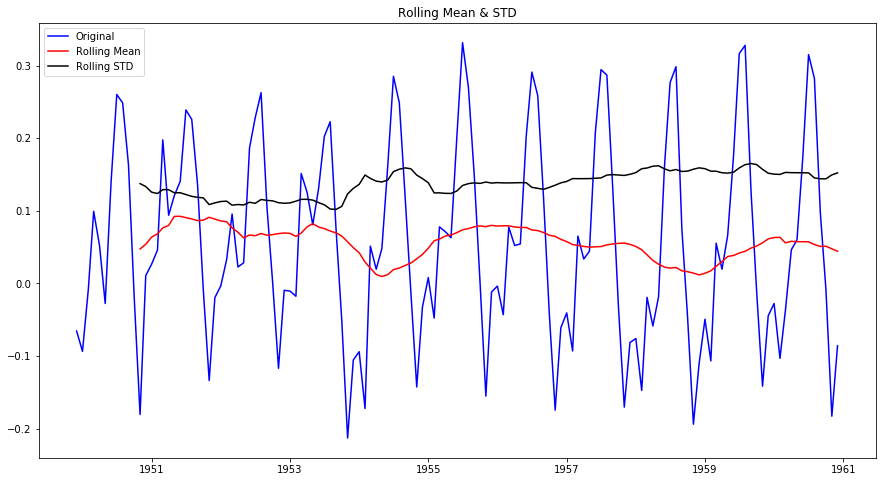

In [25]:
plotRollingMeanSTD(ts_log_moving_avg_diff, 12)

In [26]:
DickeyFullerTest(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic:          -3.162908
p-value:                  0.022235
Lag No.:                 13.000000
Observation No.:        119.000000
Critical Value (5%)      -2.886151
Critical Value (1%)      -3.486535
Critical Value (10%)     -2.579896
dtype: float64


This looks like a much better series. The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is <font color='blue'>smaller than the 5% critical values</font> so we can say with 95% confidence that this is a stationary series.

#### Exponentially Weighted Moving Average

A drawback in Moving Average particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is <font color='blue'>exponentially weighted moving average</font> where weights are assigned to all the previous values with a decay factor. Find details in following link.

http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-moment-functions

 This can be implemented in Pandas as:

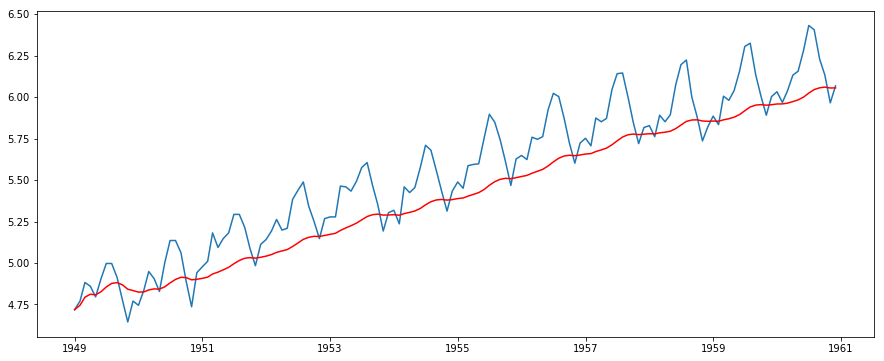

In [27]:
expwighted_avg = tsLog.ewm(halflife = 12,
                           ignore_na = False,
                           min_periods = 0,
                           adjust = True).mean()
plt.plot(tsLog)
plt.plot(expwighted_avg, color='red')# expwighted_avg.plot(style='k--')

Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above. Now, let’s remove this from series and check stationarity:

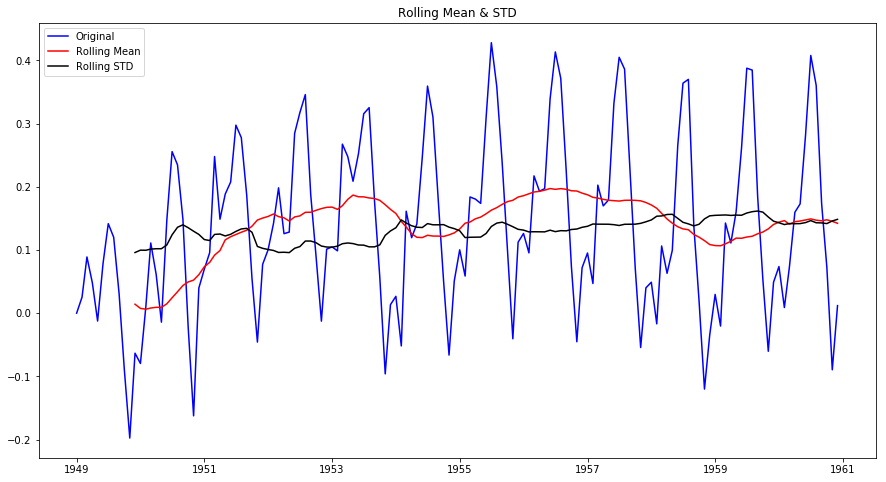

In [29]:
ts_log_ewma_diff = tsLog - expwighted_avg
plotRollingMeanSTD(ts_log_ewma_diff, 12)

In [30]:
DickeyFullerTest(ts_log_ewma_diff)

Results of Dickey-Fuller Test:
Test Statistic:          -3.601262
p-value:                  0.005737
Lag No.:                 13.000000
Observation No.:        130.000000
Critical Value (5%)      -2.884042
Critical Value (1%)      -3.481682
Critical Value (10%)     -2.578770
dtype: float64


This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

## Eliminating Trend and Seasonality

The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality. Lets discuss two ways of removing trend and seasonality:

1. <font color='blue'>Differencing</font> – taking the differece with a particular time lag
2. <font color='blue'>Decomposition</font> – modeling both trend and seasonality and removing them from the model.

#### Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:



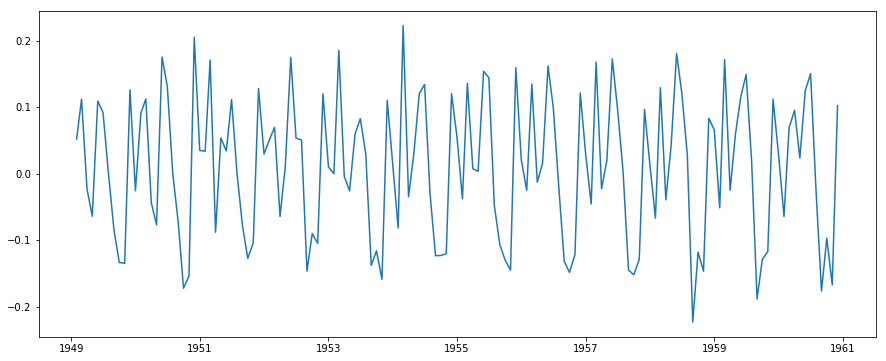

In [31]:
ts_log_diff = tsLog - tsLog.shift()
plt.plot(ts_log_diff)

This appears to have reduced trend considerably. Lets verify using our plots:

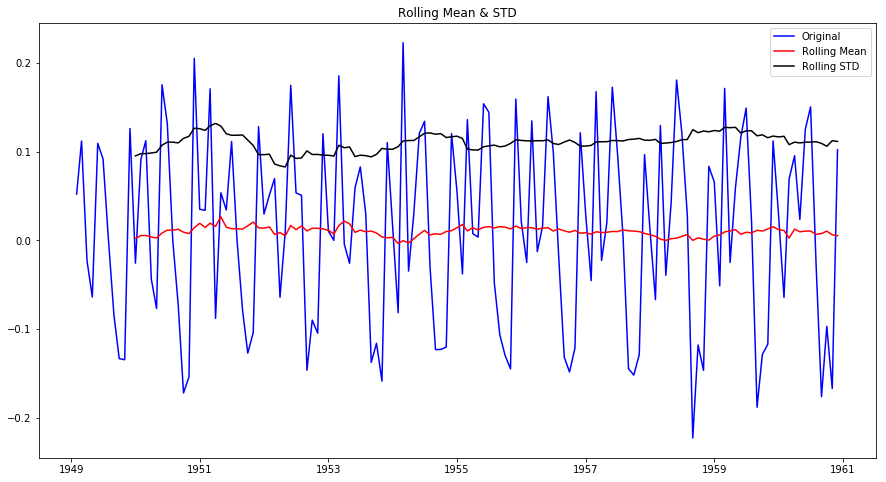

In [32]:
ts_log_diff.dropna(inplace = True)
plotRollingMeanSTD(ts_log_diff, 12)

In [33]:
DickeyFullerTest(ts_log_diff)

Results of Dickey-Fuller Test:
Test Statistic:          -2.717131
p-value:                  0.071121
Lag No.:                 14.000000
Observation No.:        128.000000
Critical Value (5%)      -2.884398
Critical Value (1%)      -3.482501
Critical Value (10%)     -2.578960
dtype: float64


We can see that the mean and std variations have small variations with time. Also, the Dickey-Fuller test statistic is <font color='blue'>less than the 10% critical value</font>, thus the TS is stationary with 90% confidence. We can also take second or third order differences which might get even better results in certain applications. I leave it to you to try them out.

### Decomposing

In this approach, both trend and seasonality are modeled separately and the remaining part of the series is returned. I’ll skip the statistics and come to the results:

In [35]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposSeasonality(timeSeries, modelType = "additive"):

    # model : str{"additive", "multiplicative"}
    # The additive model:       Y[t] = T[t] + S[t] + e[t]
    # The multiplicative model: Y[t] = T[t] * S[t] * e[t]
    
    decomposition = seasonal_decompose(timeSeries, model = modelType) 
    fig = plt.figure()
    fig = decomposition.plot()  
    fig.set_size_inches(15, 8)
    fig.show()
    return decomposition

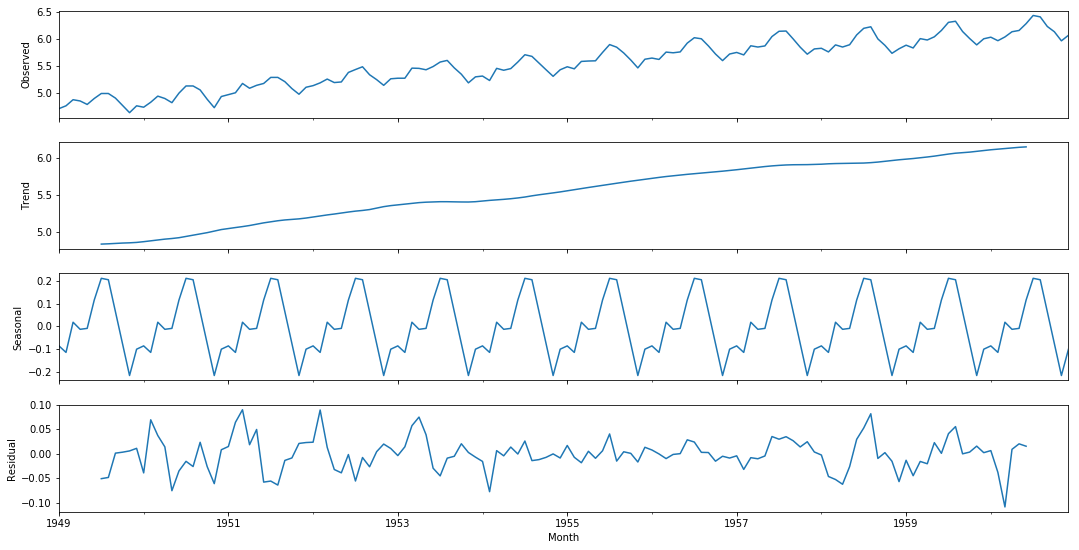

In [37]:
decomposition = decomposSeasonality(tsLog)

Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

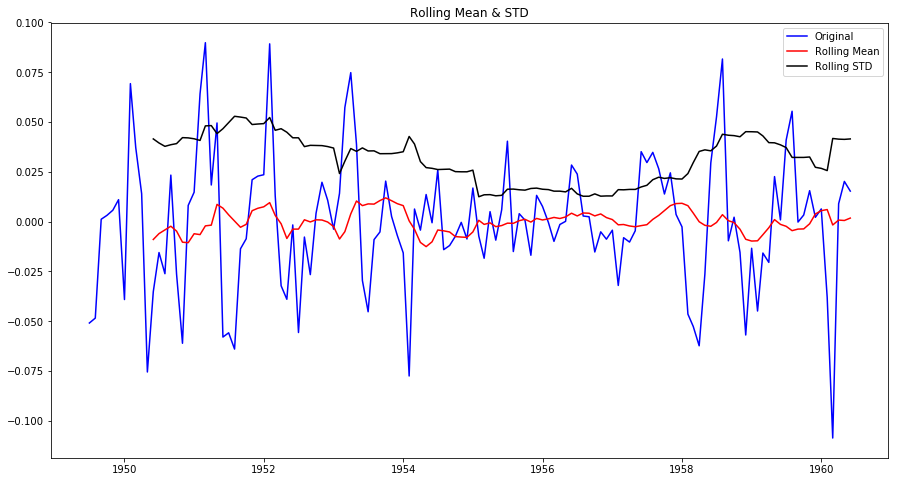

In [38]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
plotRollingMeanSTD(ts_log_decompose, 12)

In [39]:
DickeyFullerTest(ts_log_decompose)

Results of Dickey-Fuller Test:
Test Statistic:        -6.332387e+00
p-value:                2.885059e-08
Lag No.:                9.000000e+00
Observation No.:        1.220000e+02
Critical Value (5%)    -2.885538e+00
Critical Value (1%)    -3.485122e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. You can try advanced decomposition techniques as well which can generate better results. Also, you should note that converting the residuals into original values for future data in not very intuitive in this case.

## Forecasting a Time Series

We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

1. A <font color='blue'>strictly stationary series</font> with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
2. A series with <font color='blue'>significant dependence</font> among values. In this case we need to use some statistical models like ARIMA to forecast the data.

Let me give you a brief introduction to <font color='blue'>ARIMA</font>. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for <font color='blue'>Auto-Regressive Integrated Moving Averages</font>. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

1. <font color='blue'>Number of AR (Auto-Regressive) terms (p)</font>: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
2. <font color='blue'>Number of MA (Moving Average) terms (q)</font>: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
3. <font color='blue'>Number of Differences (d)</font>: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

1. <font color='blue'>Autocorrelation Function (ACF)</font>: It is a measure of the correlation between the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
2. <font color='blue'>Partial Autocorrelation Function (PACF)</font>: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

The ACF and PACF plots for the TS after differencing can be plotted as:

### ACF & PACF Plots

In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

def plotACFandPACF(timeSeries):
    fig = plt.figure(figsize=(15, 8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(timeSeries, ax = ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(timeSeries, ax = ax2)
    plt.show()
    return

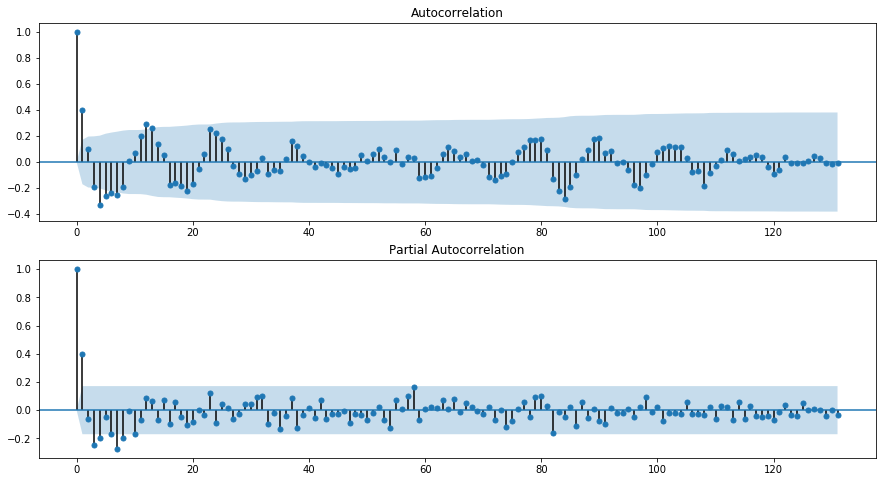

In [43]:
plotACFandPACF(ts_log_decompose)

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

1. p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
2. q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

Now, lets make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

In [45]:
from statsmodels.tsa.arima_model import ARIMA

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Let model the 3 cases:

### AR Model

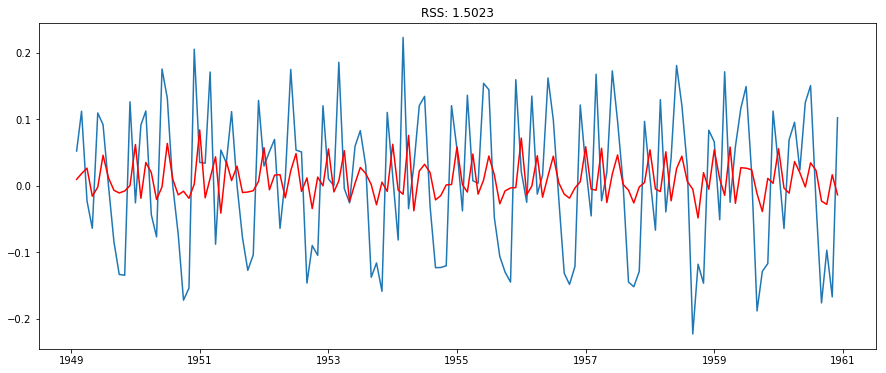

In [46]:
model = ARIMA(tsLog, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

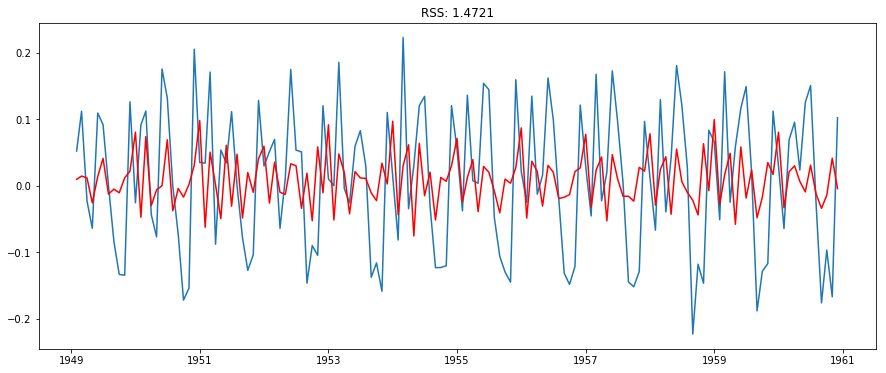

In [47]:
model = ARIMA(tsLog, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model

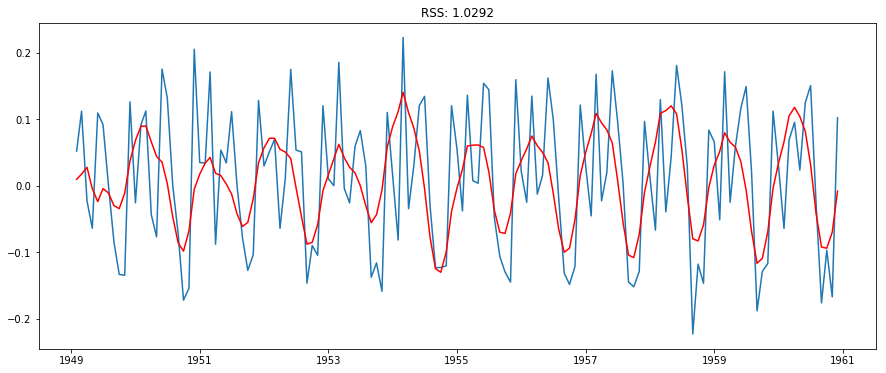

In [48]:
model = ARIMA(tsLog, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

Here we can see that the AR and MA models have almost the same RSS but combined is significantly better. Now, we are left with 1 last step, i.e. taking these values back to the original scale.

## Taking it back to original scale

Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


Notice that these start from ‘1949-02-01’ and not the first month. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


You can quickly do some back of mind calculations using previous output to check if these are correct. Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [51]:
predictions_ARIMA_log = pd.Series(tsLog.ix[0], index=tsLog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.

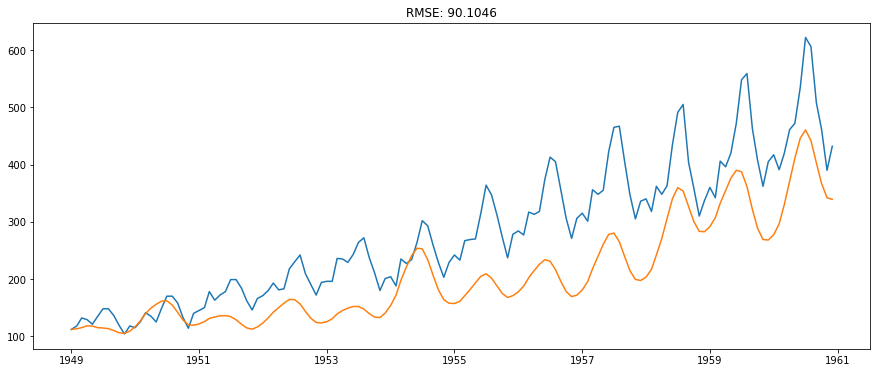

In [52]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

Finally we have a forecast at the original scale.